In [3]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import dabl

%matplotlib inline


# Clasificación de Imágenes con modelos lineales SVM

En este tutorial, veremos como ejecutar un modelo SVM con Kernel lineal para clasificar entre vino tinto y vino blanco. 

Es un problema de clasificación binaria. Por lo que, inicialmente y como en cada proyecto de ML, primero exploraremos los datos. Luego procesaremos las variables y finalmente lanzaremos nuestro modelo. 

## Primer Paso: EDA 

La exploración de datos nos ayudará a identificar patrones. Para ello, se lo puede hacer manualmente, pero también existen librerías como DABL que nos ayudan a realizar un primer análisis y nos ayudan a identificar el potencial predictivo de nuestro problema

In [4]:
# Cargamos los datos. Vienen por separado 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [5]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
# Los unimos y creamos la variable objetivo (binaria). En este caso 'type'
red['type'] = 1 # Rojo es 1
white['type'] = 0 # Blanco es 0

# los concatenamos ignorando el índice
wines_df = red.append(white, ignore_index=True)

In [7]:
# cabecera
wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


# EDA 

Todos los datos son numéricos. Exploremos con más detalle las variables para encontrar correlaciones e información relevante. La variable Quality parece ser la única NO continua, ya que tiene un caracter ordinal en un rango de clasificaicón. 

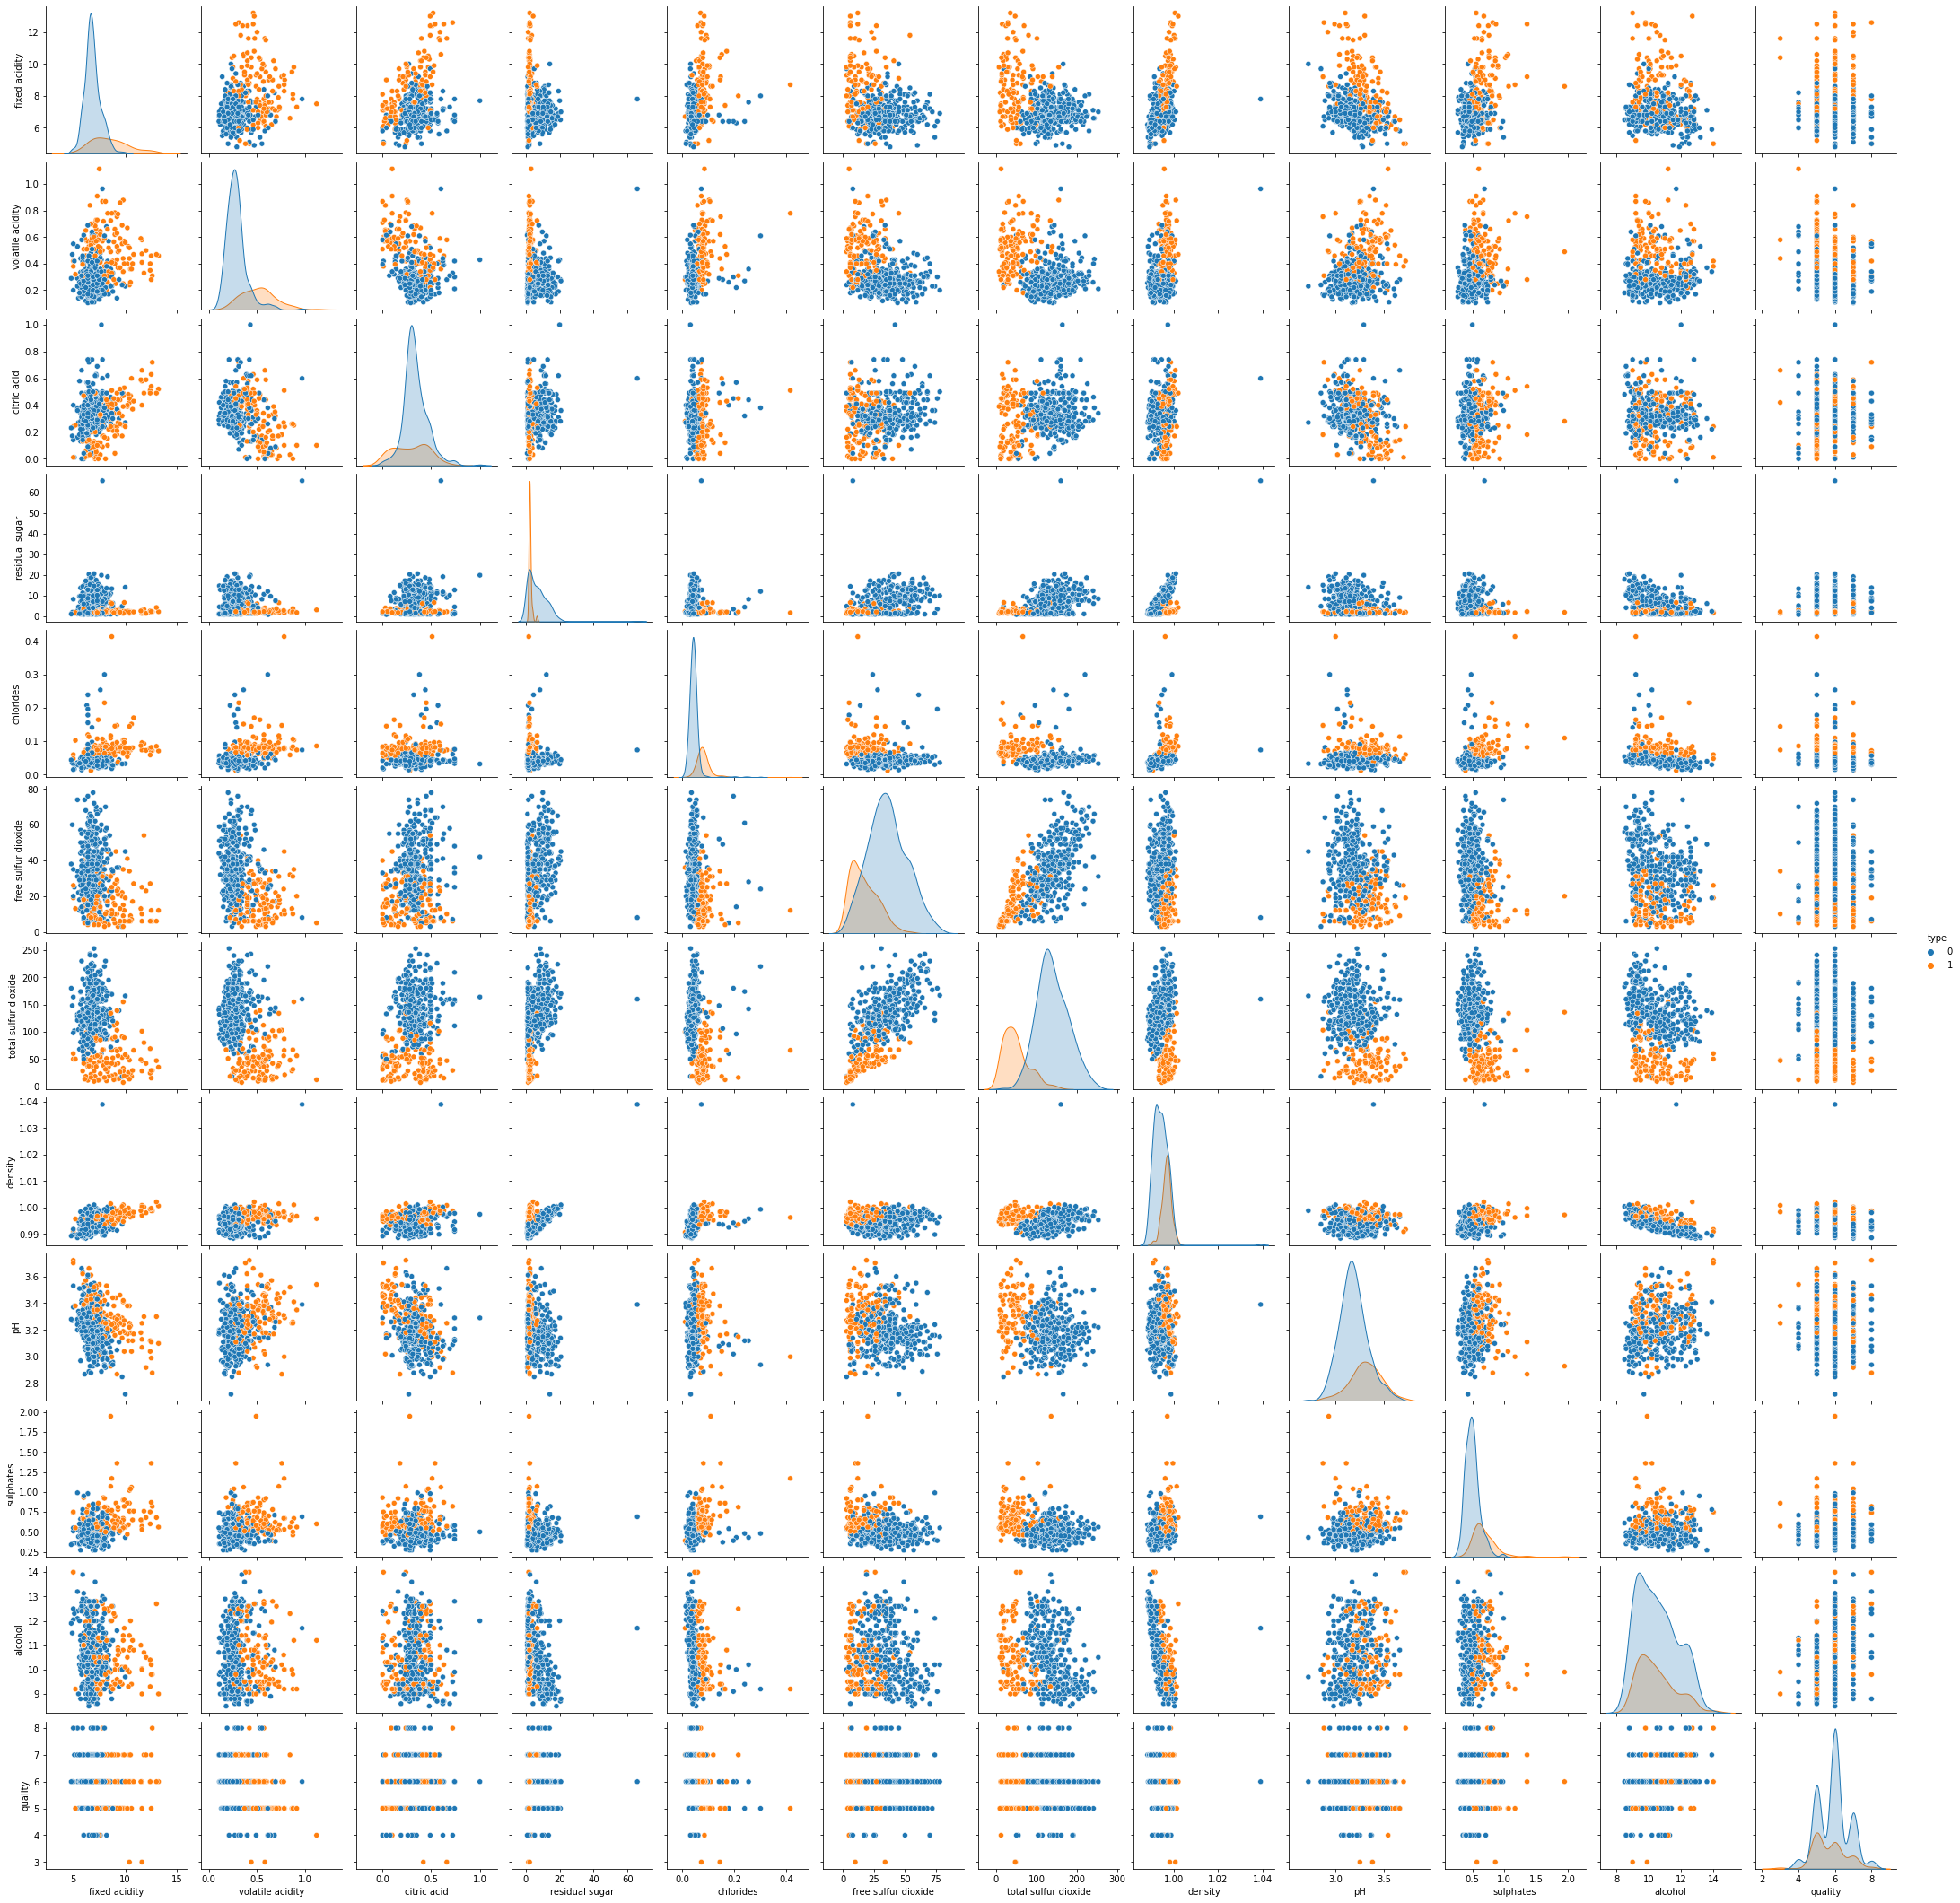

In [8]:
# Exploración de la relación entre variables
sns.pairplot(
    wines_df.sample(500), hue="type"
); # ploteamos sobre una muestra para no cargar demasiado la memoria

# DABL
La librería DABL puede hacer gran parte del análisis exploratorio para nosotros. Aprovechamos sus capacidades.

Para instalarla simplemente ejecuta en la terminal `pip install dabl` (`!pip install dabl` si quieres lanzarlo desde el Notebook)

Target looks like classification


/Users/e0449486/opt/anaconda3/lib/python3.9/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 2 outliers in column total sulfur dioxide.
  warn("Dropped {} outliers in column {}.".format(
/Users/e0449486/opt/anaconda3/lib/python3.9/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 3 outliers in column volatile acidity.
  warn("Dropped {} outliers in column {}.".format(
/Users/e0449486/opt/anaconda3/lib/python3.9/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 27 outliers in column chlorides.
  warn("Dropped {} outliers in column {}.".format(
/Users/e0449486/opt/anaconda3/lib/python3.9/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 8 outliers in column sulphates.
  warn("Dropped {} outliers in column {}.".format(
/Users/e0449486/opt/anaconda3/lib/python3.9/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 5 outliers in column fixed acidity.
  warn("Dropped {} outliers in column {}.".format(
/Users/e0449486/opt/anaconda3/lib/python3.9/sit

Linear Discriminant Analysis training set score: 0.992


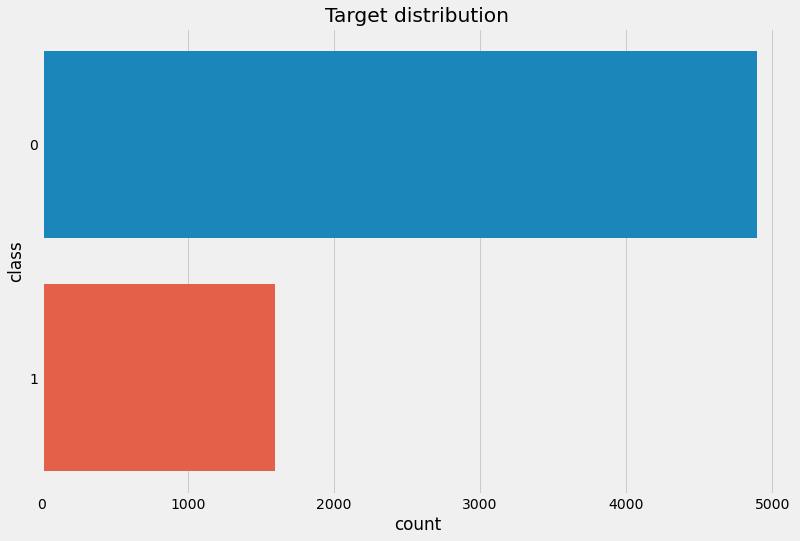

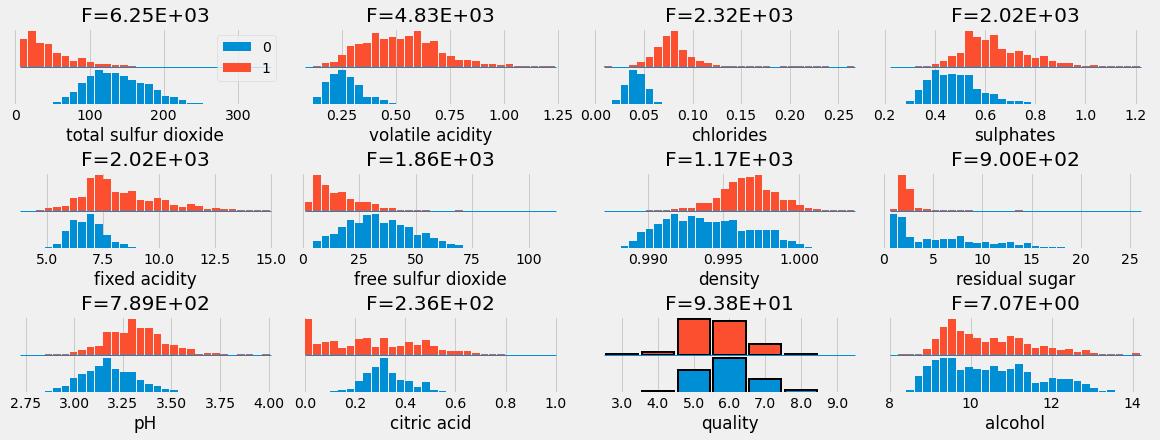

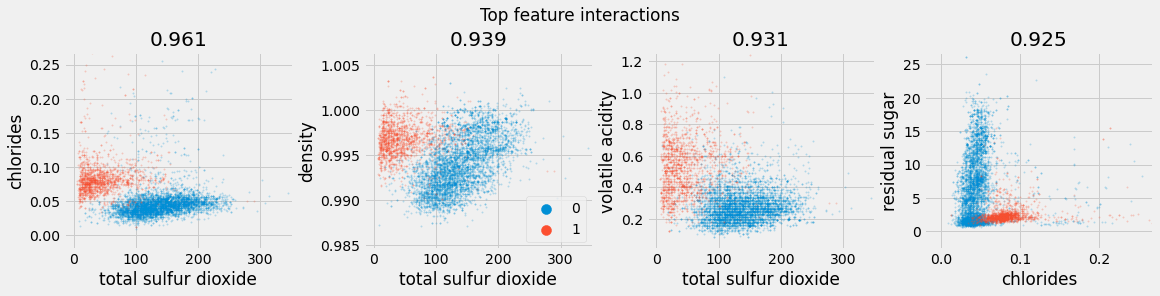

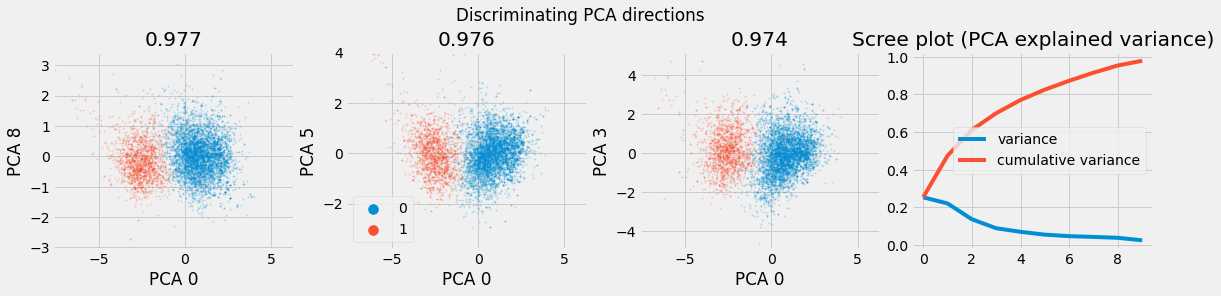

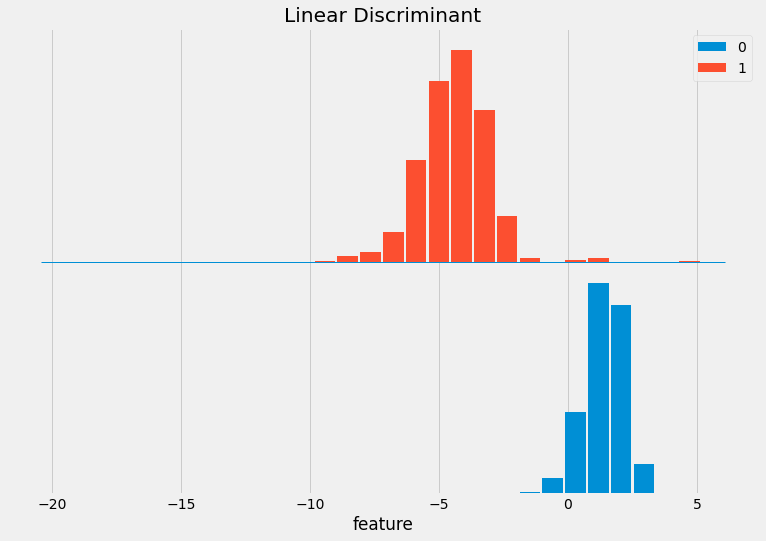

In [9]:
# Dejamos que DABL lo haga por nosotros 
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('fivethirtyeight')
dabl.plot(wines_df, target_col = 'type')
plt.show();

Los datos muestran diferencias importantes entre los tipos de vino, siendo estos fácilmente calificables utilizando algoritmos lineales. Hay un importante potencial predictivo que se puede ver claramente en las distribuciones y gráficas de DABL.  
Esta librería además devuelve el "linear discriminant analysis" que basicamente nos da una medida del potencial predictivo bajo algoritmos lineals sencillos. Mientras más cercano a 1, mayor el potencial. En este caso, es claramente un ejercicio fácil de resolver para un algoritmo lineal.

# Construimos el set de entrenamiento y prueba

El proceso de ML nos permite construir un modelo, entrenarlo y luego verificar que los resultados se mantienen en el set de validación (prueba). Típicamente se realiza una división 70-30 %


In [ ]:
!pip install --upgrade scikit-learn

In [10]:
from sklearn.model_selection import train_test_split

TARGET = 'type'
# Variables predictoras
X = wines_df.loc[:, wines_df.columns != TARGET]
# Variable objetivo
y = wines_df[TARGET].values # 

# Realizamos el Split utilizando la función de sklearn
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42,stratify=y
)

# Construímos el Modelo


Construimos una pipeline que primero Escalará los datos utilizando el MinMax Scaler. Luego pasará los datos por un modelo de regresión logística. Ese pipeline podrá ser llamado cada vez para realizar predicciones (inferencias) y así mantener siempre el mismo Scaler y cualquier procesamiento previo que se quiera realizar a los datos.

Los pipelines son fundamentales para asegurarnos que todas las transformaciones que se aplican al set de entrenamiento se apliquen también al set de prueba y por supuesto en el momento de la implementación del modelo en producción.

En SkLearn el pipeline nos permitirá realizar cross-validation. Que basicamente nos permite entrar nuestro modelo sobre diferentes combinaciones de sets de entrenamiento y prueba, para asegurarnos que tenemos un modelo robusto.


In [11]:
from sklearn.preprocessing import MinMaxScaler # Normalizamos los datos utilizando el MINMAXScaler de sklearn 
from sklearn.svm import SVC # Importamos el modelo de Regresión Logística 
from sklearn.pipeline import Pipeline # Nos ayudará a automatizar todo
from sklearn.model_selection import GridSearchCV # Nos ayudará a realizar cross-validation
#from sklearn.ensemble import RandomForestClassifier # Modelo de Random Forest
from sklearn.metrics import classification_report, accuracy_score # Métricas de precisión y performance


In [14]:

# Pipeline
clf = Pipeline([
  ('scale', MinMaxScaler()), # Scaler
  ('svm_clf', SVC(kernel='linear'))]  # Modelo SVM con kernel lineal
  )

In [15]:
scoring = "accuracy" # métrica a optimizar
cv = 4 # Número de rondas de cross validation

# Parámetros para probar diferentes hiperparametros del modelo 
param_grid = [
  {'svm_clf__C': [1, 10, 100]}  # probaremos diferentes hiperparametros de regularización
 ]

# Realizamos el modelo con cross-validation y buscamos los parámetros óptimos
grid = GridSearchCV(clf, cv=cv, param_grid=param_grid, scoring=scoring, n_jobs = -1)
grid.fit(X_train, y_train) # Entrenamos  

# Imprimimos resultados
print(f"Resultados para {scoring}")
print("Mejor: %f utilizando %s" % (grid.best_score_, 
    grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Media de Score: {mean}, Des.Std: {stdev}  Con parametros: {param}")

Resultados para accuracy
Mejor: 0.994502 utilizando {'svm_clf__C': 100}
Media de Score: 0.989223904331884, Des.Std: 0.0007260416217154179  Con parametros: {'svm_clf__C': 1}
Media de Score: 0.9929625853184189, Des.Std: 0.0010760680097311205  Con parametros: {'svm_clf__C': 10}
Media de Score: 0.9945017234010926, Des.Std: 0.001689436993124095  Con parametros: {'svm_clf__C': 100}


Qué es el paraetro C? [Explicación](https://https://stackoverflow.com/questions/22851316/what-is-the-inverse-of-regularization-strength-in-logistic-regression-how-shoul)

In [16]:
# Hacemos la predicción para el Set de prueba 
m_best = grid.best_estimator_ # Utilizamos el mejor estimador
y_pred = m_best.predict(X_test) # predicimos con predict

# Imprimimos los resultados del modelo
print (pd.crosstab(y_test,y_pred,
                   rownames = ['Actual'],
                   colnames = ['Preddición']))

print(f'Accuracy: {round(accuracy_score(y_pred, y_test),3)}')
print("-----------------------")
print("Reporte Detallado: ")

print(classification_report(y_test, y_pred,))

Preddición     0    1
Actual               
0           1465    5
1              5  475
Accuracy: 0.995
-----------------------
Reporte Detallado: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1470
           1       0.99      0.99      0.99       480

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



El modelo tiene un altísimo nivel de precisión para ambas clases. Ha aprendido los patrones correctamente y salvo pocas excepciones, ha logrado predecir correctamente el tipo de vino según los datos. Como paso final, exploremos los coeficientes de neustro modelo. Cuál es la variable más relevante de nuestra predicción? 

# Sacamos los Coeficientes de nuestro Modelo

Al lanzar el SVM con kernel lineal, podemos también obtener los coeficientes (como en una regresión logística). Lo que es muy poderoso a la hora de la interpretabilidad del modelo.

In [17]:
log = m_best.steps[1][1] # Sacamos el modelo del pipeline
coef =log.coef_ # lista de coeficientes 
# Lo pasamos a un DataFrame para que sea presentable
coeffi_df = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(coef))],
                   axis = 1)
# Cambiamos los nombres de las columnas para mejorar la presentación
coeffi_df.columns = ["Variable","Coeficientes"] 
coeffi_df.sort_values('Coeficientes') # ordenamos 

,Variable,Coeficientes
3,residual sugar,-23.680582
6,total sulfur dioxide,-8.875316
0,fixed acidity,-2.069757
2,citric acid,-1.509067
8,pH,-1.054066
11,quality,0.942144
9,sulphates,2.224172
1,volatile acidity,4.190274
4,chlorides,4.693295
10,alcohol,5.097328


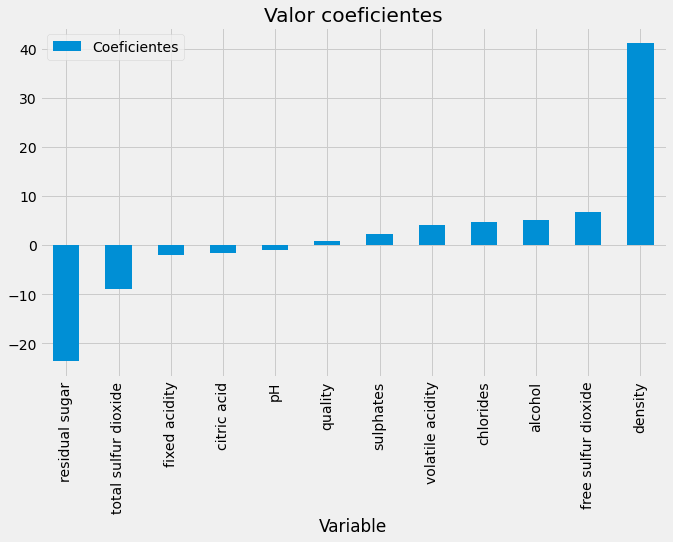

In [18]:
coeffi_df.sort_values('Coeficientes').plot(x='Variable',
                                           y='Coeficientes', 
                                           figsize=(10,6),
                                           kind='bar')
plt.title("Valor coeficientes")
plt.show();

# Guardado y Carga del Modelo

Guardamos el mejor modelo (m_best) para utilizarlo después. Sklearn nos permite no solo guardar el modelo en sí, pero también se guardan los pasos de preprocesamiento del pipeline. Es decir, se incluye el normalizador en este caso

In [ ]:
import pickle # Pickle nos permite guardar objetos en formato binario
#  Guardamos el Modelo en Disco
filename = 'mi_primer_modelo_pipeline.pickle' # ruta 
pickle.dump(m_best, open(filename, 'wb'))
m_best

Pipeline(memory=None,
         steps=[('scale', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('log_clf',
                 LogisticRegression(C=10000, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
# Cargamos el modelo 
modelo_cargado = pickle.load(open(filename, 'rb'))

In [ ]:
# Hacemos una inferencia 
# Recuerda que ya esta cargado en el pipeline entero
modelo_cargado.predict(X_test[:15]) # predicimos con predict

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)